# Heat Map of Los Angeles

   The heat map contains the most popular 500 pickup locations in Los Angeles. The more popular the spot is, the color on the map becomes darker.

In [1]:
from heat_map import load_uber_file, extract_movement_id, top_500_pickup_location, heat_map

### Cleaned dataframe with Uber Movement Information

We extract both the overall information of travel times and also each source id and destination id's coordinates

In [2]:
movement = load_uber_file('LA_20171_Hourly_Weekdays.csv')

In [4]:
movement_ids = extract_movement_id('./data/LA_map.json')

### Draw a heat map with the popularity of the top 500 pickup locations

In [5]:
top_500_pickup = top_500_pickup_location(movement)

heat_map(movement_ids, top_500_pickup, movement)

# Analysis the traffic incidents of LA areas

In [6]:
from incidents_areas import load_incidents_area_file, define_la_areas, draw_blocks_area, draw_blocks_incidents

### Load the LA incidents data

In [7]:
traffic = load_incidents_area_file('Traffic_Collision.csv')

In [8]:
example = traffic.groupby('Area Name')['Area Name'].count()

### We define Los Angeles by some popular areas

In [9]:
new = define_la_areas(traffic)

new

,index,Area_Name,min_lat,max_lat,min_lon,max_lon
0,1,Central,-118.2810,-118.2257,33.9747,34.0748
1,2,Devonshire,-118.6193,-118.4694,34.2380,34.3508
2,3,Foothill,-118.4502,-118.2661,34.2326,34.3185
3,4,Harbor,-118.3275,-118.1937,33.7065,33.8729
4,5,Hollenbeck,-118.2286,-118.1554,34.0139,34.1115
5,6,Hollywood,-118.4312,-118.3005,34.0763,34.2199
6,10,Northeast,-118.3031,-118.1451,34.1132,34.2036
7,12,Pacific,-118.4815,-118.2804,33.9165,34.0317
8,14,Southeast,-118.2767,-118.2128,33.8729,33.9747
9,16,Topanga,-118.6667,-118.5622,34.1421,34.2391


### We draw the blocks of LA areas

These blocks are produced based on the given area names in the traffic data. However, in order to be more clear, we manually delete some of the smaller areas to make the blocks to have as fewer intersections as possible.

In [10]:
plot1 = draw_blocks_area(new)

Loading BokehJS ...

### Draw the colored areas based on number of incidents

We draw the same blocks filled with colors based on the number of traffic incidents happened in the areas

In [11]:
plot2 = draw_blocks_incidents(new, traffic)

Loading BokehJS ...

# Analysis the traffic incidents of LA freeways 

In [12]:
from traffic_incidents_freeway import load_pems_incidents, top_9_freeways, total_traffic_incidents_dayofmonth, traffic_incidents_freeways_dayofmonth

### Table after cleaning the dataset

In [14]:
traffic = load_pems_incidents('./data/incidents_2017_1.txt')

### Generate the plot of total number of incidents 

This plot is genereated by the freeways traffic dataset. For each of the hours, we calculate the total number of incidents and draw a plot with respect to the hours.


In [15]:
total_traffic_incidents_dayofmonth(traffic)

Loading BokehJS ...

### Generate the plot of total number of incidents for each of the freeways in LA

The plot contains top 9 busiest freeways in Los Angeles. The label of freeways is in the order of the number of total incidents descendingly. 

In [16]:
top_9_freeway = top_9_freeways(traffic)

traffic_incidents_freeways_dayofmonth(traffic)

Loading BokehJS ...

# Travel times of LA areas 

## Special case between Central and Harbor

In [15]:
from barPlot import make_plot, getPlotSource
from heat_map import load_uber_file, extract_movement_id

In [16]:
record = extract_movement_id('LA_map.json')
res = getPlotSource(record,4,1)
res['left'] = res.hod
res['right'] = res.hod+1
plot = make_plot(res)

output_notebook()

handle = show(plot, notebook_handle=True)

AttributeError: 'DataFrame' object has no attribute 'area_id'

# Traffic flow and speed of LA freeways
We will generate the daily flow plots for several main freeways in LA. And then, we will choose some specific freeway to focus on and make a flow and speed plot. 

In [17]:
from freeway import speed,flow,plot
import pandas as pd

### Load the flow data for 9 main freeways

In [18]:
data_110f = pd.read_csv('./data/I110_flow.csv',sep=',')
data_5f = pd.read_csv('./data/I5_flow.csv',sep=',')
data_10 = pd.read_csv('./data/I10.csv',sep=',')
data_10f = pd.read_csv('./data/I10_flow.csv',sep=',')
data_405f = pd.read_csv('./data/I405_flow.csv',sep=',')
data_210f = pd.read_csv('./data/I210_flow.csv',sep=',')
data_605f = pd.read_csv('./data/I605_flow.csv',sep=',')
data_710f = pd.read_csv('./data/I710_flow.csv',sep=',')
data_60f = pd.read_csv('./data/SR60_flow.csv',sep=',')
data_91f = pd.read_csv('./data/SR91_flow.csv',sep=',')

### Generate the flow plot

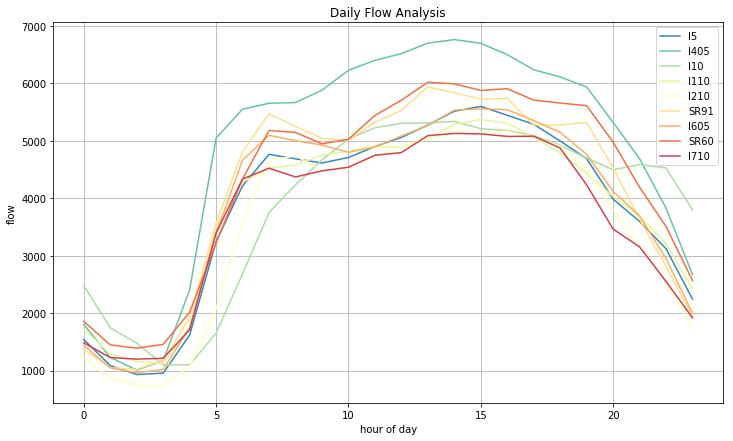

In [19]:
data = [data_5f,data_405f,data_10f,data_110f,data_210f,data_91f,data_605f,data_60f,data_710f]
name = ['I5','I405','I10','I110','I210','SR91','I605','SR60','I710']

plot(data,name)

### Generate the flow and speed plot for freeway I-405
We choose I-405 since it has the most flow overall. We will make a flow plot and a speed plot for it to find out its feature. 

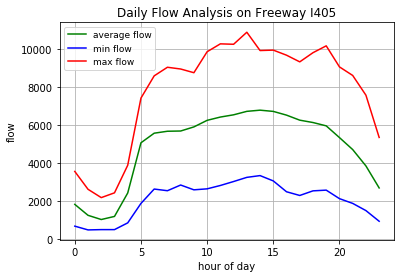

In [20]:
flow(data_405f,'I405')

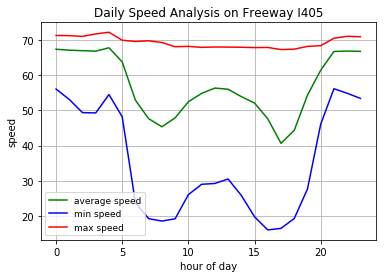

In [21]:
data_405 = pd.read_csv('./data/I405.csv',sep=',')

speed(data_405,'I405')

### Generate the flow and speed plot for freeway I-10
We choose I-10 since it has relative more flow at nights. We will make a flow plot and a speed plot for it to find out its feature. 

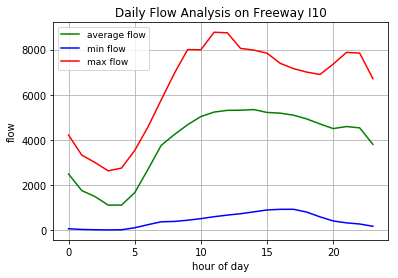

In [22]:
flow(data_10f,'I10')

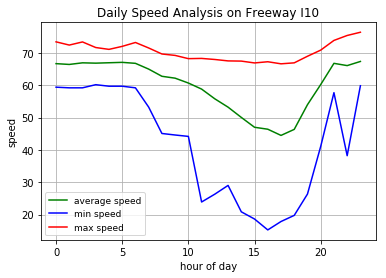

In [23]:
data_10 = pd.read_csv('./data/I10.csv',sep=',')

speed(data_10,'I10')